In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
import ipdb
np.random.seed(666)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0],[[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4],[[1, .5],[.5, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)

In [104]:
def show(X, y, w_0, w, title = "Samples and Classifier"):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = np.dot(xy, w[:2]) + w[2:]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='b')
    
    Z = np.dot(xy, w_0[:2]) + w[2:]
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='y')

    display.clear_output(wait=True)
    plt.title(title)
    plt.show()

In [28]:
class Variable():
    def __init__(self,):
        pass

In [43]:
# class Perception():
#     def __init__(self,x, y, lr=1) -> None:
#         self.x = x
#         self.y = y
#         self.w = np.zeros((x.shape[1]+1, 1))
#         self.lr=lr
#         self.x = np.concatenate((self.x,np.ones((x.shape[0],1))), axis=1)
#         self.grad = np.zeros_like(y).reshape(-1,1)
#         self.trainable = True

#     def __f_x(self,input):
#         return np.float32(input > 0)

#     def eval(self,):
#         self.trainable = False

#     def train(self,):
#         self.trainable = True
    
#     def forward(self,x_in):
#         x_in = np.concatenate((x_in,np.ones((x_in.shape[0],1))), axis=1)
#         self.x = x_in
#         self.y_i = self.__f_x(np.dot(x_in, self.w))
#         self.y = np.reshape(self.y, self.y_i.shape)
#         if self.train:
#             self.grad = self.y - self.y_i
#         return self.y_i

#     def backward(self,):
#         if self.train == False:
#             print("Warning: Model Not Trainable")
#             return
#         w_t1 = self.w + self.lr * np.dot(self.x.T, self.grad)
#         self.w = w_t1

In [100]:
class Perception():
    def __init__(self,n_feature, lr=1) -> None:
        self.n_feature = n_feature
        self.w = np.zeros((n_feature+1, 1))
        self.lr=lr
        self.trainable = True

    def __f_x(self,input):
        return np.float32(input > 0)

    def eval(self,):
        self.trainable = False

    def train(self,):
        self.trainable = True
    
    def forward(self,x_in,y_in=None):
        if x_in.shape[-1] is not self.n_feature:
            print(f"Error: expect [-1, {self.n_feature}] but got {x_in.shape}")
            return
        x_in = np.concatenate((x_in,np.ones((x_in.shape[0],1))), axis=1)
        y_out = self.__f_x(np.dot(x_in, self.w))
        if self.trainable ==  True:
            y_in = np.reshape(y_in, y_out.shape)
            self.grad = y_in - y_out
        return y_out

    def backward(self,x_in):
        if self.trainable == False:
            print("Error: Model Not Trainable")
            return
        if x_in.shape[-1] is not self.n_feature:
            print(f"Error: expect [-1, {self.n_feature}] but got {x_in.shape}")
            return
        x_in = np.concatenate((x_in,np.ones((x_in.shape[0],1))), axis=1)
        w_t1 = self.w + self.lr * np.dot(x_in.T, self.grad)
        self.w = w_t1
    
    def cal_error(self, label, pred):
        n_sam = label.shape[0]
        err = np.sum(np.abs(pred - label)) / n_sam
        return err


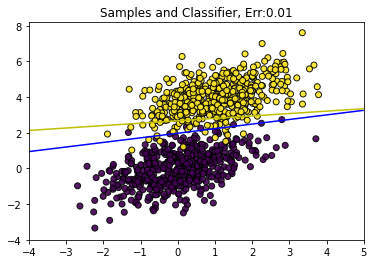

In [112]:
acc_s = []
model = Perception(2,lr=1e-3)
epoch = 80
err_th = 0.01
err=1.0
# for i in range(epoch):
while err > err_th:
    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    w_0 = model.w
    model.lr *= 0.95
    for j in range(len(X_train)):
        y_i = model.forward(X_train,Y_train)
        model.backward(X_train)
    # if i%1 == 0:
    model.eval()
    # test
    y_t = model.forward(X_test)
    acc = sum(y_t == Y_test.reshape(-1,1))/len(Y_test)
    acc_s.append(acc)
    err = model.cal_error(Y_test.reshape(-1,1), y_t)
    show(X, Y, w_0, model.w, title = f"Samples and Classifier, Err:{err}")
    model.train()
    

    

array([0.98])

In [107]:
Y_test.shape[0]

100